# Euler-Lagrange | Péndulos

[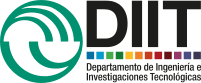](https://ingenieria.unlam.edu.ar/)    
[by-nc-sa_80x15.png](https://creativecommons.org/licenses/by-sa/4.0/deed.es_ES) 
2025 [Víctor A. Bettachini](mailto:vbettachini@unlam.edu.ar)  

---

## Introducción

A continuación se presentan dos expresiones matemáticas.
- El origen de las mismas se presenta en el video **"El extraño principio de física que da forma a la realidad"** adjunto a este cuaderno que debe verse previamente a leer este documento.
- Su derivación detallando el paso a paso se presenta en el **PDF "Apunte sobre el libro de Lanczos"**.
Se indica en la referencia el número de sección ($\S$) correspondiente.

Luego se resuelve un problema haciendo uso de la ecuación de Euler-Lagrange.
Finalmente se ofrece una función que automatizará su aplicación a otros problemas.

### Lagrangiano
> Referencia
> - Apunte Lanczos $\S5$ "Principio de Hamilton: de d’Alembert al Lagrangiano"

El Lagrangiano (o función Lagrangiana) de un sistema es determinado por la energía cinética $T$ y el potencial $V$ expresados en función de coordenadas, velocidades generalizadas y eventualmente del tiempo,
$$
\mathcal{L} (q_i, \dot{q}_i, t)= T(q_i, \dot{q}_i, t) - V(q_i, \dot{q}_i, t).
$$

### Ecuación de Euler-Lagrange

> Referencia
> - Apunte Lanczos $\S6$ "Ecuación de Euler-Lagrange"

La ecuación de Euler-Lagrange para una coordenada generalizada $q_i$ es
$$
\begin{aligned}
\frac{\mathrm{d}}{\mathrm{d} t} \frac{\partial \mathcal{L} }{\partial \dot{q}_i }
& -\frac{\partial \mathcal{L} }{\partial q_i}
 = 0
\end{aligned},
$$
donde $\mathcal{L}$ es el Lagrangiano del sistema.

A partir de un único $\mathcal{L}$ se generarán tantas ecuaciones de Euler-Lagrange como $q_i$ se hayan empleado para modelizar el sistema físico.

## Ecuación de Euler-Lagrange para una partícula libre

Para una partícula libre que se mueve en $\hat{x}$ el Lagrangiano es la energía cinética
$$
\mathcal{L} = T = \frac{m}{2} \dot{x}^2 .
$$
Si se diferencia en la velocidad $\dot{x}$ se obtiene el momento lineal
$$
p_x = \frac{\partial}{\partial \dot{x}} \mathcal{L} = \frac{\partial}{\partial \dot{x}} T = m \dot{x} .
$$

Esto mismo se aplica para toda coordenada generalizada haciendo que los momentos generalizados se obtengan de 
$$
p_i = \frac{\partial}{\partial \dot{q_i}} \mathcal{L}. 
$$

Se utiliza esto para la parte de la ecuación de Euler-Lagrange en que
$$\frac{\mathrm{d}}{\mathrm{d}t} \frac{\partial}{\partial \dot{q_i}} \mathcal{L} = \frac{\mathrm{d}}{\mathrm{d}t} p_i$$
donde se deriva respecto al tiempo el momento generalizado $p_i$.

Para terminar de construir la ecuación de Euler-Lagrange derivar respecto $\mathcal{L}$ respecto a la coordenada generalizada
$$
\frac{\partial}{\partial q_i} \mathcal{L}.
$$

Para esta partícula no hay dependencia de $\mathcal{L}$ con la coordenada generalizada utilizada, $x$, así que la ecuación de Euler-Lagrange queda
$$
\begin{aligned}
\frac{\mathrm{d}}{\mathrm{d} t} \frac{\partial \mathcal{L} }{\partial \dot{x} }
 -\frac{\partial \mathcal{L} }{\partial x}
& = 0\\
 m \ddot{x} &= 0
\end{aligned},
$$
Es decir que la aceleración de la partícula es nula, lo que es esperable para una partícula libre en el espacio que no tiene fuerzas actuando sobre ella, y por tanto, no cambia su velocidad.

## Péndulo ideal

Un péndulo simple conviene trabajarlo en coordenadas cilíndricas.
En estas un péndulo rígido e ideal tiene una única componente no nula de su velocidad: la que va en $\hat{\varphi}$, es decir, $\dot{\vec{r}} \cdot \hat{\varphi}= \ell \dot{\varphi}$.
Basta elegir como única coordenada generalizada $\varphi$.

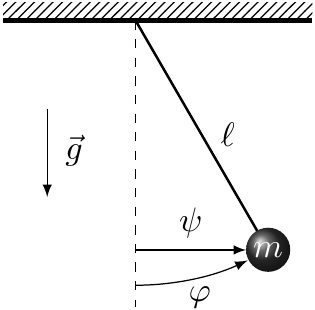

In [1]:
import sympy as sm # importamos funciones de cálculo simbólico
from sympy.physics import mechanics as me # de sympy utilizaremos funciones de mecánica
me.init_vprinting() # notación con punto para la velocidad y punto punto para la aceleración

In [28]:
# Defino los parámetros físicos del sistema
m, g, l = sm.symbols('m, g, \ell', positive=True)

# Defino coordenadas generalizadas
e = me.ReferenceFrame('e') # sistema de referencia en coordenadas cartesianas
phi = me.dynamicsymbols('varphi')

In [29]:
partícula_m = m
partícula_r = l*(sm.sin(phi)* e.x - sm.cos(phi)* e.y )  # el versor y apunta hacia arriba
partícula_r

In [4]:
def energíaCinéticaTraslación(masa, posición, marcoDeReferencia):
    """
    A partir de la masa y posición de una partícula puntual en un marco de referencia devuelve su energía cinética.
    
    Parámetros
    ----------
    masa: (sympy.core.symbol.Symbol)
        De un partícula
    posición: (sympy.physics.vector.vector.Vector)
        del centro de masa de la partícula
    marcoDeReferencia: (sympy.physics.vector.frame.ReferenceFrame)
        En el que se expresa la posición
    
    Retorna
    -------
    Igualdad Sympy (sympy.core.relational.Equality)
        En su lado derecho explicita la energía cinética del sistema en función de coordenadas y velocidades generalizadas y el tiempo.
        Energía cinética, T = (m/2) \dot{\vec{r}} \cdot\dot{\vec{r}}
    """
    velocidad = posición.dt(marcoDeReferencia)
    unMedio = sm.Rational(1,2) # Rational: fracción de enteros, alternativamente podría haberse usado 0.5 
    T_traslación = sm.Eq(
        sm.Symbol('T_{traslación}'),
        unMedio* masa* velocidad.dot(velocidad)
        ).simplify()
    return T_traslación

In [5]:
# Energía cinética del sistema
partícula_T = energíaCinéticaTraslación(partícula_m, partícula_r, e)
partícula_T

Si se estable $V(y_0)= 0$ el potencial gravitatorio es $V(y)= m g y$, pero al usar coordenadas cilíndricas es mejor calcular con el ahora conocido
$$
V_\mathrm{gravitatoria} = - \vec{P} \cdot \vec{r} = - (m \vec{g}) \cdot \vec{r}
$$

In [6]:
def energíaPotencialGravitatoria(masa, posición, aceleracionGravitatoria):
    """
    Retorna la energía potencial gravitatoria de una partícula de masa m cuya posición r está dada en un sistema de referencia en el cual g es la aceleración gravitatoria terrestre.
    
    Parámetros
    ----------
    aceleracionGravitatoria: (sympy.physics.vector.vector.Vector)
        vector orientado según el sistema de referencia
    masa: (sympy.core.symbol.Symbol
        del cuerpo en cuestión
    posición: (sympy.core.symbol.Symbol)
        del centro de masa en un sistema de referencia relacionable con el de aceleracionGravitatoria
    
    Retorna
    -------
    Igualdad Sympy (sympy.core.relational.Equality)
        En su lado derecho explicita la energía potencial del sistema en función de coordenadas y velocidades generalizadas y el tiempo.
    coordenadaGeneralizada: Símbolo Sympy (sympy.core.symbol.Symbol)
        V = - (m \vec{aceleracionGravitatoria}) \cdot{posición}
    """
    V_gravitatoria = sm.Eq(
        sm.Symbol('V_{gravitatoria}'),
        - (masa* aceleracionGravitatoria).dot(posición)
        ).simplify()
    return V_gravitatoria

In [7]:
# Energía potencial
g_vector = g* (-e.y) # aceleración gravitatoria en -y versor
partícula_V = energíaPotencialGravitatoria(partícula_m, partícula_r, g_vector)
partícula_V

### Lagrangiano del péndulo ideal
Con las $T$ y $V$ previamente calculadas puede escribirse el Lagrangiano de este péndulo ideal
$$
\mathcal{L}(\varphi, \dot{\varphi})= T(\dot{\varphi}) - V(\varphi)
$$

In [8]:
t = sm.Symbol('t') # se derivará respecto al tiempo, por tanto se lo define como símbolo
L_ideal = sm.Eq(sm.Function('\mathcal{L}')(phi, sm.diff(phi,t) ) , partícula_T.rhs - partícula_V.rhs ) 
L_ideal

### Ecuación de Euler-Lagrange del péndulo ideal
Utilizaremos este sencillo sistema para mostrar que Euler-Lagrange permite obtener las mismas ecuaciones de la dinámica que se obtenienen con la 2.a ley de Newton.   

Planteamos la ecuación de Euler-Lagrange correspondiente para la única coordenada generalizada, $\varphi$
$$
\begin{aligned}
\frac{\mathrm{d}}{\mathrm{d} t} \frac{\partial \mathcal{L} }{\partial \dot{\varphi} }
- \frac{\partial \mathcal{L} }{\partial \varphi} &
 = 0 \\
\end{aligned}.
$$

Empezamos calculando
$$
\frac{\mathrm{d}}{\mathrm{d}t} \frac{\partial}{\partial \dot{\varphi_i}} \mathcal{L}
$$

In [9]:
phi_dtdp = L_ideal.rhs.diff(phi.diff(t)).diff(t) # primero deriva respecto a x1 punto y luego a t
phi_dtdp.simplify()

Y luego
$$
\frac{\partial}{\partial \varphi_i} \mathcal{L}
$$

In [10]:
phi_dq = L_ideal.rhs.diff(phi)
phi_dq.simplify()

Y con estos se escribe la ecuación de Euler-Lagrange

In [11]:
phi_EL = sm.Eq(
  phi_dtdp - phi_dq,
  0
  ).simplify()
phi_EL

De aquí puede despejarse

In [12]:
variable = phi.diff(t,2) # diff(t,2): derivada segunda respecto al tiempo
sm.Eq(
  variable,
  sm.solveset(phi_EL, phi.diff(t,2) ).args[0]
  )

## Péndulo con punto de suspensión libre
>Ejercicio 2 sección 5 ($\S 5$)  
Lev Davidovich Landau, y E. M. Lifshitz. Mecánica. 2.a. Curso de física teórica. Reverté, 1994.

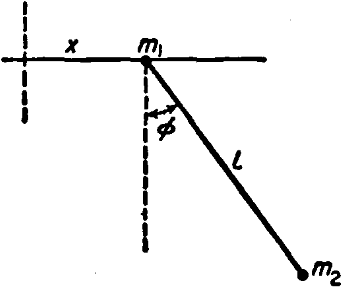

In [13]:
# Defino los parámetros físicos del sistema
m1, m2, g, l = sm.symbols('m_1, m_2, g, \ell', positive=True)

# Defino coordenadas generalizadas 
t = sm.symbols('t') # tiempo
x, phi = me.dynamicsymbols('x, varphi')

# posiciones
partícula1_r = x* e.x
partícula2_r = partícula1_r + l* (sm.cos(phi)* (-e.y) + sm.sin(phi)* (e.x)) # recordemos que tomamos y hacia arriba

# masas
partícula1_m = m1
partícula2_m = m2

In [14]:
# Energía cinética del sistema
partícula1_T = energíaCinéticaTraslación(partícula1_m, partícula1_r, e)
partícula2_T = energíaCinéticaTraslación(partícula2_m, partícula2_r, e)
libre_T = sm.Eq(
  partícula1_T.lhs,
  partícula1_T.rhs + partícula2_T.rhs
  ).simplify()
libre_T

In [15]:
# Energía potencial
g_vector = g* (-e.y) # aceleración gravitatoria en -y versor
partícula1_V = energíaPotencialGravitatoria(partícula1_m, partícula1_r, g_vector)
partícula2_V = energíaPotencialGravitatoria(partícula2_m, partícula2_r, g_vector)
libre_V = sm.Eq(
  partícula2_V.lhs,
  partícula1_V.rhs + partícula2_V.rhs 
  ).simplify()
libre_V

### Lagrangiano

Con $T$ y $V$ finalmente expresamos
$$
\mathcal{L} (\dot{x}, \varphi, \dot{\varphi})=
T(\dot{x}, \varphi, \dot{\varphi}) - V(\varphi).
$$

In [16]:
libre_L = sm.Eq(
  sm.Function('\mathcal{L}')(x.diff(t), phi, phi.diff(t) ),
  libre_T.rhs - libre_V.rhs
  ).simplify()
libre_L

### Dos coordenadas, dos ecuaciones de Euler-Lagrange

En el sistema tenemos dos grados de libertad que describimos con las coordenadas generalizadas $x_1$ y $\varphi$.
Deben obtenerse sendas ecuaciones de Euler-Lagrange.

La de $x$ será
$$
\frac{\mathrm{d}}{\mathrm{d} t} \frac{\partial \mathcal{L} }{\partial \dot{x}} 
- \frac{\partial \mathcal{L} }{\partial x} 
= 0
$$



La parte izquierda es sencilla porque $x$ no figura en el Lagrangiano entonces
$$
\frac{\partial \mathcal{L} }{\partial x} = 0.
$$

La parte derecha la resolvemos en dos pasos. Primero la **derivada parcial** respecto a la velocidad generalizada, $\dot{x}$,
$$
\frac{\partial \mathcal{L} }{\partial \dot{x}} =
(m_1 + m_2) \dot{x} + m_2 \ell \cos{(\varphi)} \dot{\varphi}.
$$

Y esto a su vez le aplicamos la **derivada total** respecto a $t$, esto significa que todo lo que tenga dependencia con el tiempo debe derivarse siguiendo la regla de la cadena, 
$$
\frac{\mathrm{d}}{\mathrm{d} t} \frac{\partial \mathcal{L} }{\partial \dot{x}} =
(m_1 + m_2) \ddot{x} + m_2 \ell ( - \sin{(\varphi)} \dot{\varphi}^2 +  \cos{(\varphi)} \ddot{\varphi} ).
$$

Juntando ambas partes tenemos

$$
\begin{aligned}
\frac{\mathrm{d}}{\mathrm{d} t} \frac{\partial \mathcal{L} }{\partial \dot{x} }
- \frac{\partial \mathcal{L} }{\partial x} 
& = 0 \\
\left[ (m_1 + m_2) \ddot{x} + m_2 \ell ( - \sin{(\varphi)} \dot{\varphi}^2 +  \cos{(\varphi)} \ddot{\varphi} ) \right]
- 0 & = 0\\
m_1 \ddot{x} + m_2 ( - \ell \sin{(\varphi)} \dot{\varphi}^2 +  \ell \cos{(\varphi)} \ddot{\varphi} + \ddot{x} ) & = 0.
\end{aligned}
$$

In [17]:
x_libre_EL = sm.Eq(
  libre_L.rhs.diff(x.diff(t) ).diff(t) - libre_L.rhs.diff(x),
  0
  ).simplify()
x_libre_EL

Para $\varphi$ la expresión es un poco más compleja

$$
\begin{aligned}
\frac{\mathrm{d}}{\mathrm{d} t} \frac{\partial \mathcal{L} }{\partial \dot{\varphi}} 
& - \frac{\partial \mathcal{L} }{\partial \varphi}
= 0 \\
\frac{\mathrm{d}}{\mathrm{d} t} \left[ 
   m_2 \ell^2 \dot{\varphi}
 + m_2 \dot{x} \ell \cos{\varphi} 
 \right]
& 
- \left[m_2 g \ell (-\sin{\varphi}) + m_2 \dot{x} \ell (-\sin{\varphi}) \dot{\varphi} \right]
 =0 \\
 m_2 \left[ 
     \ell^2 \ddot{\varphi}
  + \dot{x} \ell (-\sin{\varphi}) \dot{\varphi}
  + \ddot{x} \ell \cos{\varphi}
 \right] 
 & -
 (-\sin{\varphi}) \left[ m_2 g \ell + m_2 \dot{x} \ell \dot{\varphi} \right]
 = 0
\end{aligned}.
$$

In [18]:
phi_libre_EL = sm.Eq(
  libre_L.rhs.diff(phi.diff(t) ).diff(t)
  - libre_L.rhs.diff(phi) ,
  0
  )
phi_libre_EL

Esto puede simplificarse

In [19]:
phi_libre_EL.simplify()

Resolver la dinámica de las ecuaciones de Euler-Lagrange acopladas ($\ddot{x}$ figura en ambas) es algo que haremos más adelante en el curso cuando hagamos simulaciones numéricas con la computadora.

### Recuperando el péndulo ideal

Podemos recuperar el caso del péndulo rígido ideal a partir del péndulo de suspensión libre si "inmovilizamos" $m_1$ estableciendo $x \equiv 0$ y por tanto $\dot{x} = 0$.

En el Lagrangiano

In [20]:
substituciones = {
    x : 0,
    x.diff(t) : 0,
} # esto en Python se denomina diccionario
libre_L.subs(substituciones)

que es el del péndulo ideal. 

Lo mismo puede hacerse en la ecuación de Euler-Lagrange para $\varphi$

In [21]:
phi_libre_EL_subs = phi_libre_EL.subs(substituciones).simplify()
phi_libre_EL_subs

donde entre paréntesis figura la ecuación de la dinámica para el péndulo ideal de la que puede despejarse

In [22]:
variable = phi.diff(t,2)
sm.Eq(
  variable,
  sm.solveset(phi_libre_EL_subs, phi.diff(t,2) ).args[0]
  )

## Función que genera Euler-Lagrange

Así como se hizo para las energías cinética y potencial se puede escribir una función en Python para que calcule una ecuación de Euler-Lagrange.

In [23]:
def eulerLagrange(T, V, coordenadaGeneralizada):
    '''    
    Esta función devuelve la ecuación de Euler-Lagrange para una coordenada generalizada a partir de las energías del sistema.
    
    Parámetros
    ----------
    T : Igualdad Sympy (sympy.core.relational.Equality)
        En su lado derecho explicita la energía cinética del sistema en función de coordenadas y velocidades generalizadas y el tiempo.
    V : Igualdad Sympy (sympy.core.relational.Equality)
        En su lado derecho explicita la energía potencial del sistema en función de coordenadas y velocidades generalizadas y el tiempo.
    coordenadaGeneralizada: Símbolo Sympy (sympy.core.symbol.Symbol)
        Para la que quiere obtenerse la ecuación de Euler-Lagrange
        
    Retorna
    -------
    Igualdad Sympy (sympy.core.relational.Equality)
        Ecuación de Euler-Lagrange homogénea para la coordenadaGeneralizada
    '''
    lagrangiano = (T.rhs - V.rhs).expand()
    t = sm.Symbol('t') # como se deriva respecto al tiempo con la función diff se declara t como símbolo 
    return sm.Eq(
        lagrangiano.diff(coordenadaGeneralizada.diff(t)).diff(t)
        - lagrangiano.diff(coordenadaGeneralizada) 
        , 0
    ).simplify()

Esta función debe utilizarse para cada una de las coordenadas generalizadas.

En el caso del péndulo con punto de suspensión libre se hizo uso de dos: $x, \varphi$, por lo que habrá que utilizar esta función dos veces. 

In [24]:
x_EL = eulerLagrange(libre_T, libre_V, x)
phi_EL = eulerLagrange(libre_T, libre_V, phi)
x_EL

Esta es igual a la obtenida manualmente para la coordenada $x$.

In [25]:
phi_EL

Y lo mismo para $\varphi$.

Es notorio que no se requirió calcular el Lagrangiano, de eso se ocupa la función.